In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [17]:
train_df = pd.read_csv('./Data/train.csv')

In [27]:
# Data shaping
train_df = pd.read_csv('./Data/train.csv')
train_df["Survived"] = train_df["Survived"] == 1
# Female = 0
# Male = 1
train_df["Sex"] = [0 if train_df.iloc[i]["Sex"] == 'female' else 1 for i in range(len(train_df))]

# Training Data shuffle
train_df = train_df.reindex(np.random.permutation(train_df.index))

# Test Data reading
test_df = pd.read_csv('./Data/test.csv')
test_df["Sex"] = [0 if test_df.iloc[i]["Sex"] == 'female' else 1 for i in range(len(test_df))]

In [19]:
def build_model(model_learning_rate,feature_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units=1,input_shape=(feature_size,),activation=tf.sigmoid))

    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=model_learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy',threshold=0.8)]
        )

    return model

In [20]:
def train_model(model, feature, label, epochs):
    history = model.fit(x=feature, y=label, batch_size=None, epochs=epochs, shuffle=True)

    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    epochs = history.epoch

    hist = pd.DataFrame(history.history)


    return trained_weight, trained_bias, epochs, hist



In [21]:
def plot_results(epochs,metric,hist):
    #Loss curve
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.plot(epochs, hist[metric], label=metric)
    plt.legend()
    plt.ylim([hist[metric].min()*0.97, hist[metric].max()])
    plt.show()



In [22]:
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [23]:
# Hyperparameters.
learning_rate = 0.01
epochs = 20
batch_size = 50

my_feature = ["Pclass","Sex"]
my_label="Survived" 

# Discard any pre-existing version of the model.
my_model = None

# Build and Train
my_model = build_model(learning_rate,len(my_feature))
weight, bias, epochs, hist = train_model(my_model, train_df[my_feature], train_df[my_label], epochs)

Epoch 1/20
28/28 [==============================] - 0s 3ms/step - loss: 0.7330 - accuracy: 0.6162
Epoch 2/20
28/28 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.6162
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.6162
Epoch 4/20
28/28 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.6162
Epoch 5/20
28/28 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.6162
Epoch 6/20
28/28 [==============================] - 0s 1ms/step - loss: 0.5310 - accuracy: 0.6162
Epoch 7/20
28/28 [==============================] - 0s 1ms/step - loss: 0.5206 - accuracy: 0.6162
Epoch 8/20
28/28 [==============================] - 0s 1ms/step - loss: 0.5119 - accuracy: 0.6162
Epoch 9/20
28/28 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.6162
Epoch 10/20
28/28 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.6162
Epoch 11/20
28/28 [

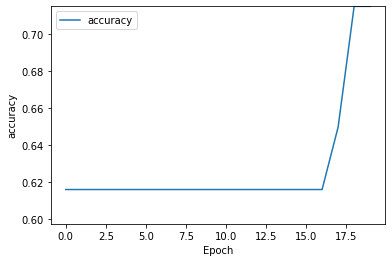

In [24]:
plot_results(epochs,'accuracy',hist)

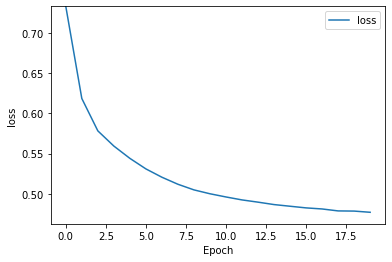

In [25]:
plot_results(epochs,'loss',hist)

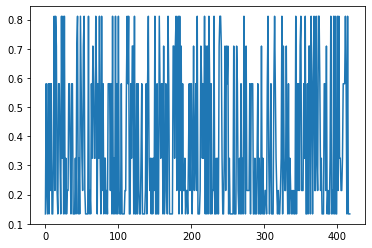

In [28]:
# Predict
prediction_tensor = tf.sigmoid(np.dot(test_df[my_feature],weight)+bias)
plt.plot(prediction_tensor)

In [29]:
# Prepare sumbmission file
prediction_df = test_df[["PassengerId"]].copy()

In [30]:
list_of_list = (prediction_tensor.numpy() >= 0.5).astype(int).tolist()
survived_list = [item for elem in list_of_list for item in elem]
prediction_df = prediction_df.assign(Survived=survived_list)

In [31]:
prediction_df.to_csv('./deeplearning_submission.csv',index=False,header=True)